# **Boston House Price Prediction**

<h4>Name: Gaurav Kumar Gupta</h4><h4>Student ID:23079942</h4>
<h4>Link to repository:<a href="https://github.com/gauravgupt8/Machine-Learning-Neural-Network-Assignment" target="_blank"> Click Here</a> </h4>
<h4>Link to ReadMe file:<a href="https://github.com/gauravgupt8/Machine-Learning-Neural-Network-Assignment/blob/main/README.md" target="_blank"> Click Here</a> </h4>:


# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Assigning the name of the column in the form of 'list'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [13]:
# Importing the dataset in the variable 'df' and assigning the column names as specified above
df = pd.read_csv('Housing dataset.csv', header=None, delimiter=r"\s+", names=column_names)

In [17]:
# Viewing the top 5 values of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# viewing the bottom 5 values of the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [21]:
# Shape of the dataset
df.shape

(506, 14)

In [23]:
# Checking if they are any null values present in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in the dataset!

In [25]:
# Function to identify numeric features:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)

Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [27]:
# Function to identify categorical features:
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)

Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [10]:
# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)

Datatypes of all the columns:


,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,float64


# Detecting the outliers in the continuous columns

In [29]:
# Function to detect outliers in every feature
def detect_outliers(df):
  cols = list(df)
  outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
  for column in cols:
    if column in df.select_dtypes(include=np.number).columns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      fence_low = q1 - (1.5*iqr)
      fence_high = q3 + (1.5*iqr)
      outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})], ignore_index=True)
  return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


# Exploratory Data Analysis and Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

Univariate analysis
* Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.
* Let's construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same.

Histograms



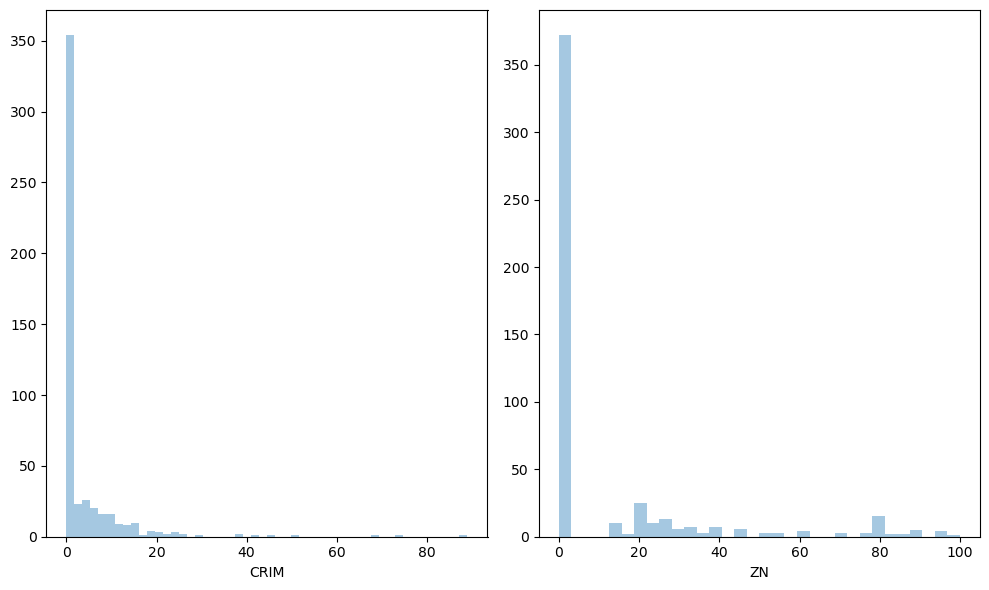

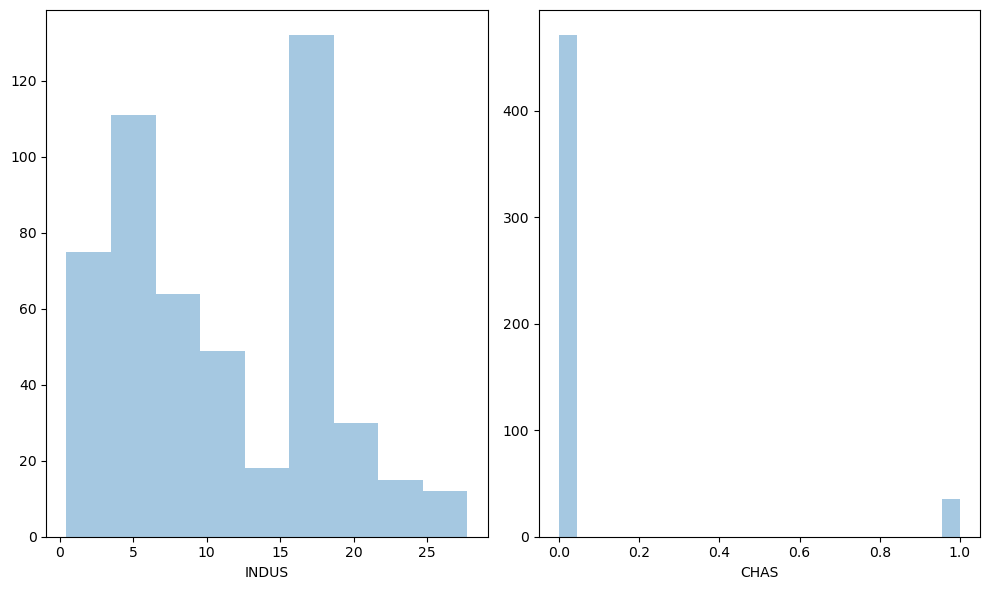

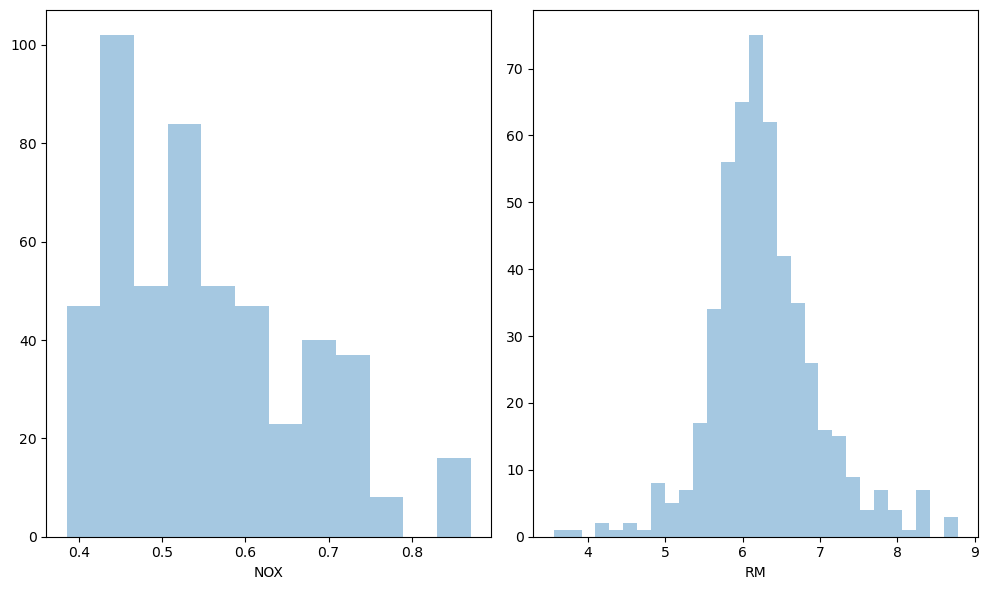

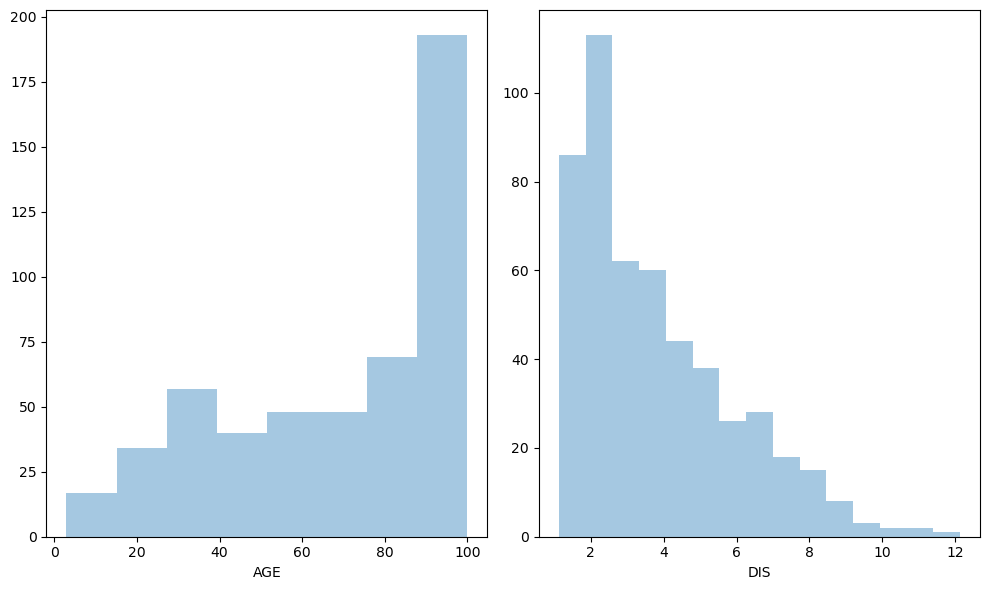

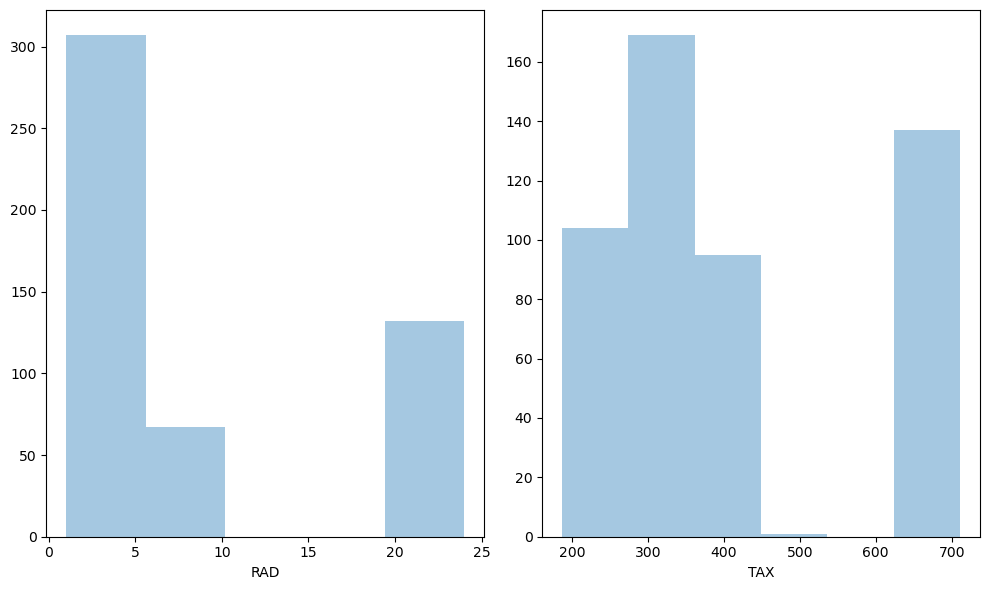

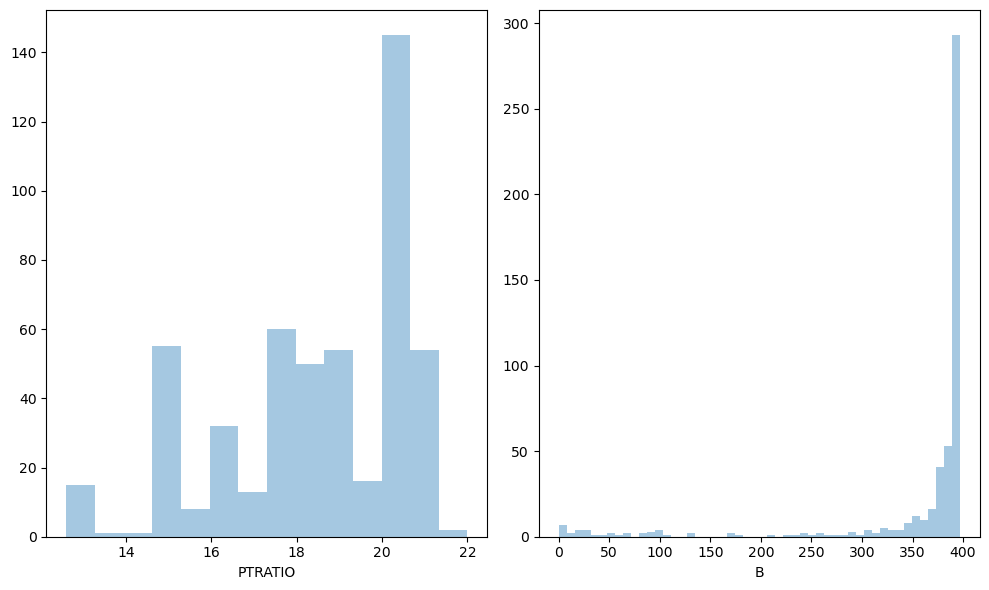

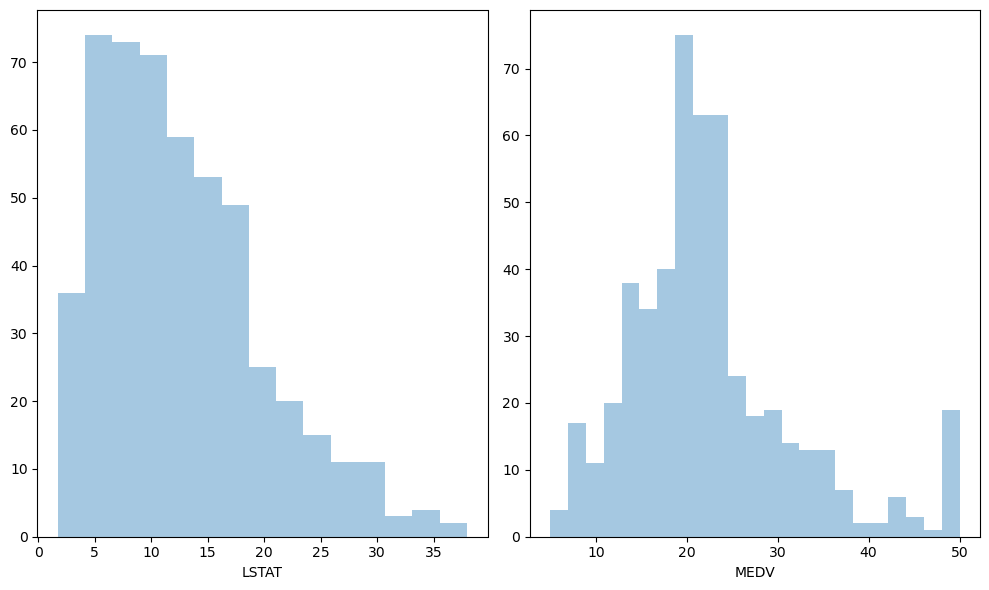


Box Plots



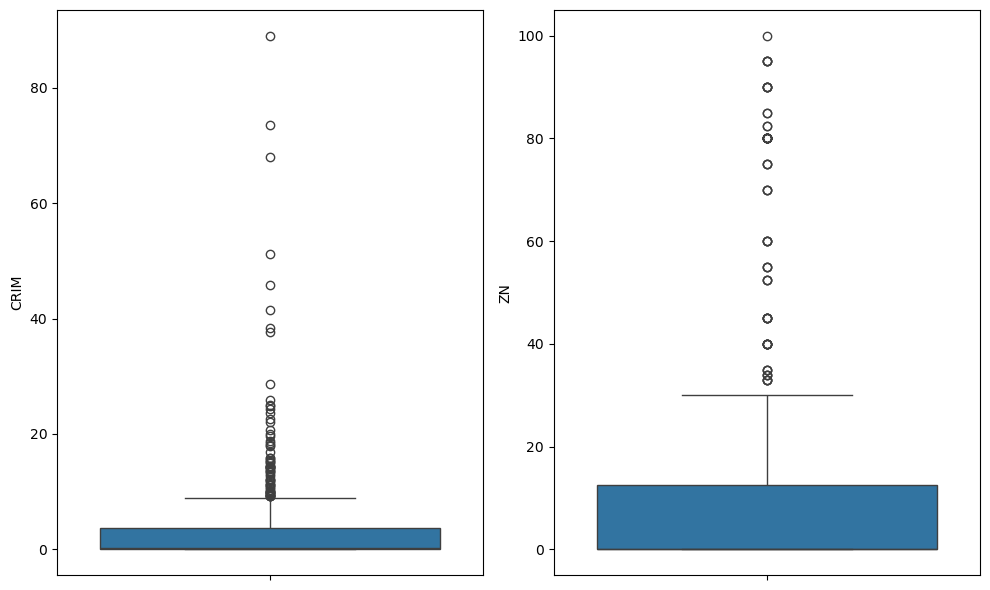

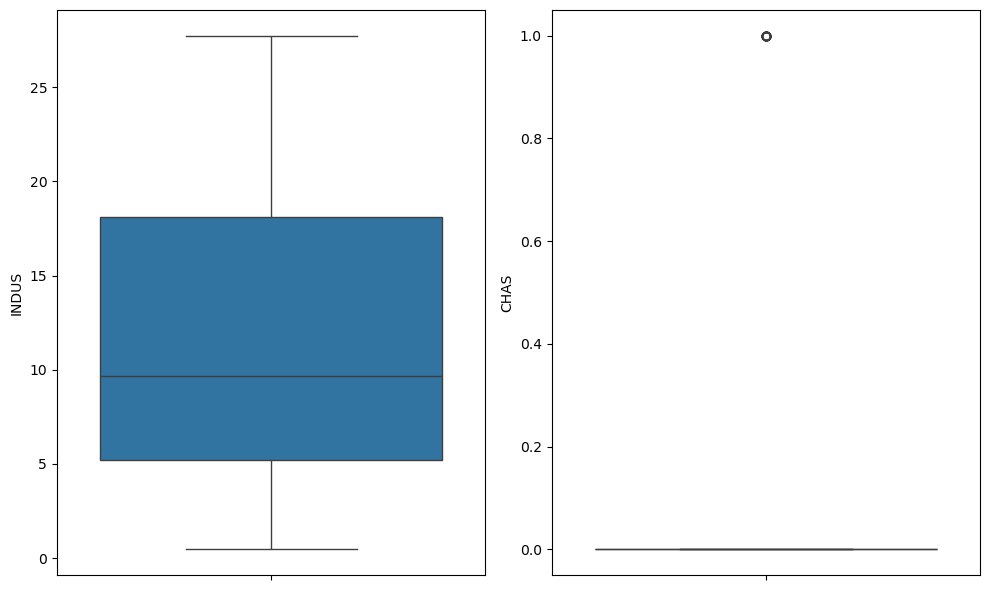

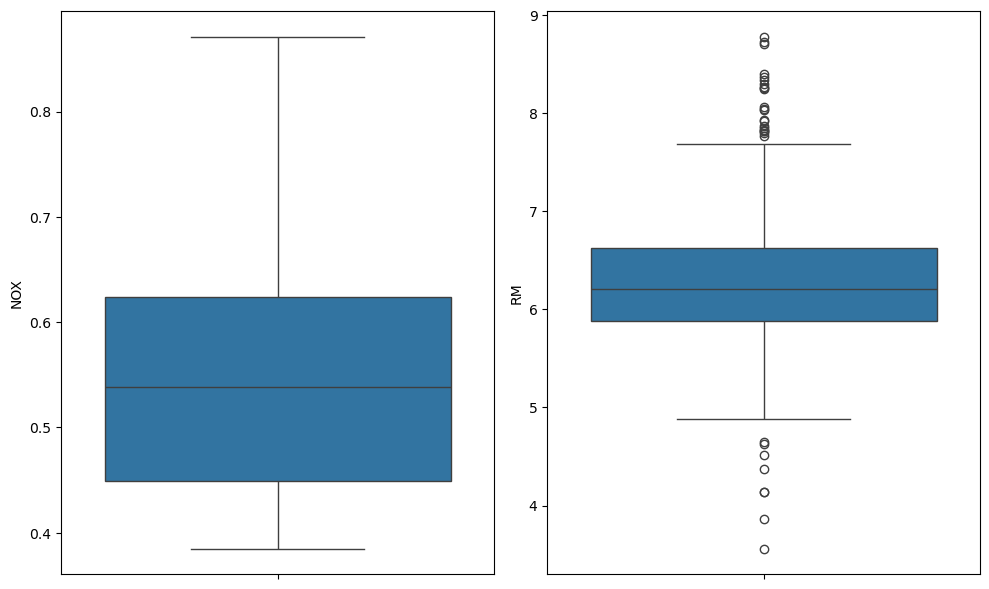

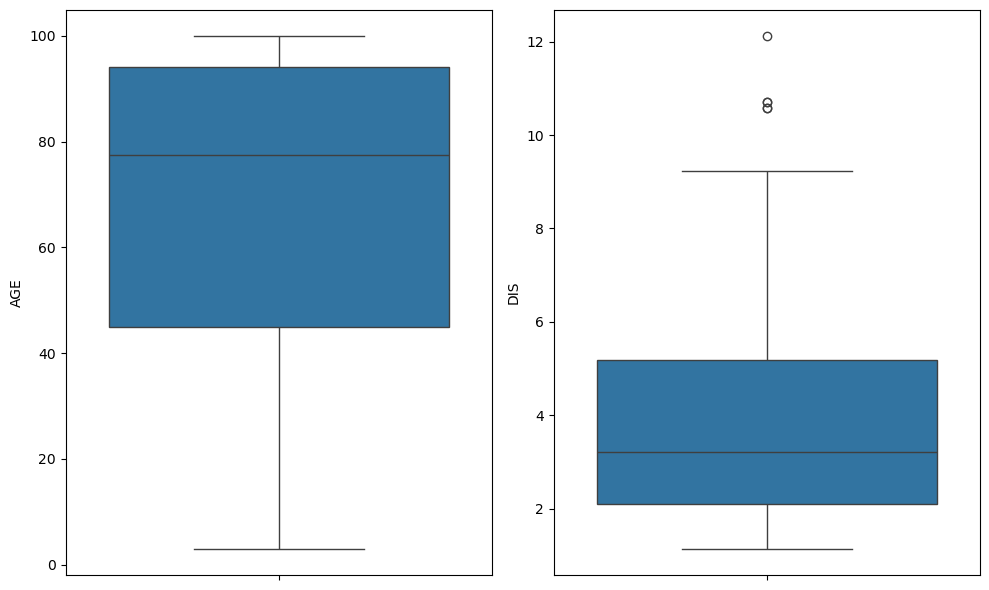

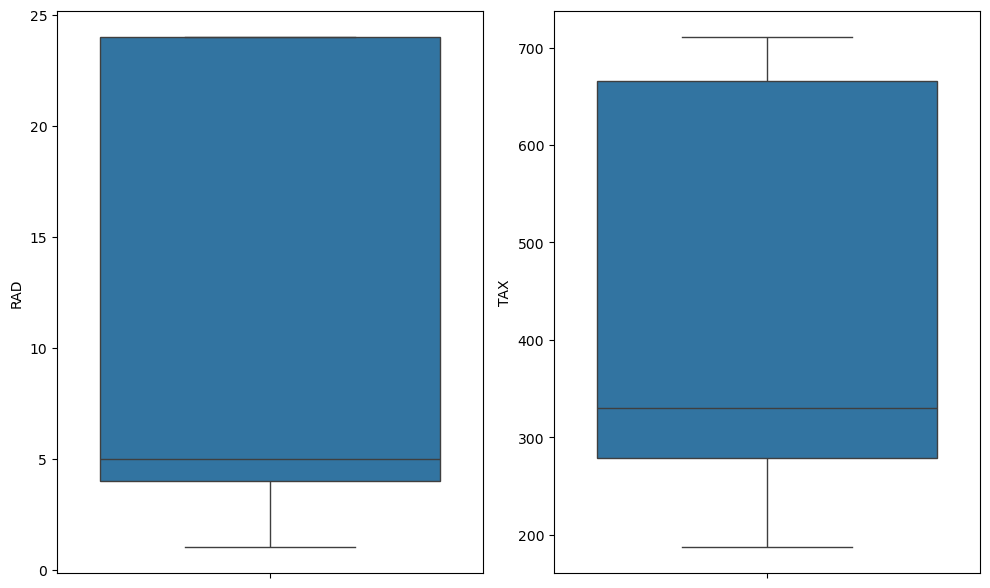

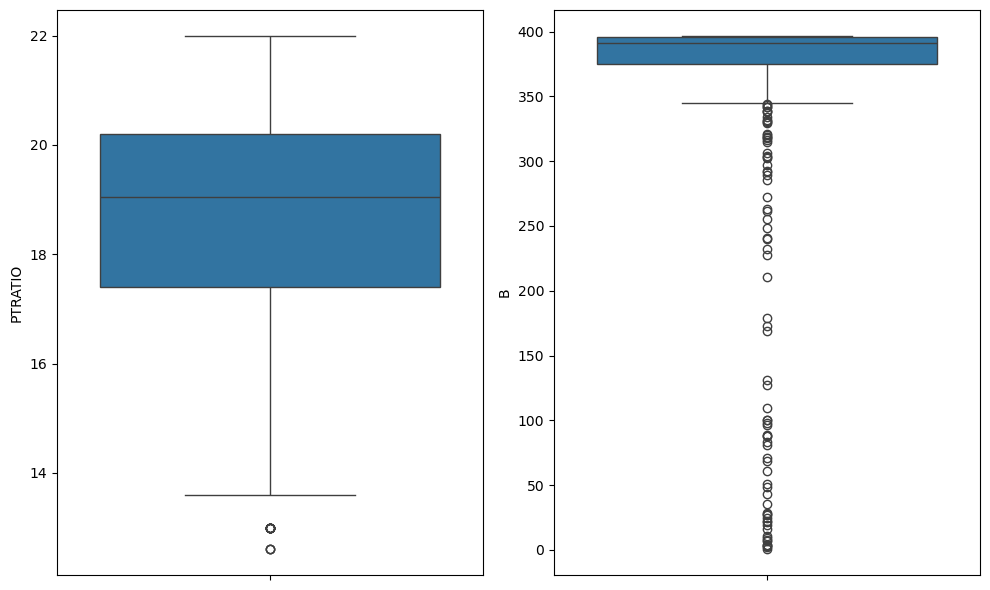

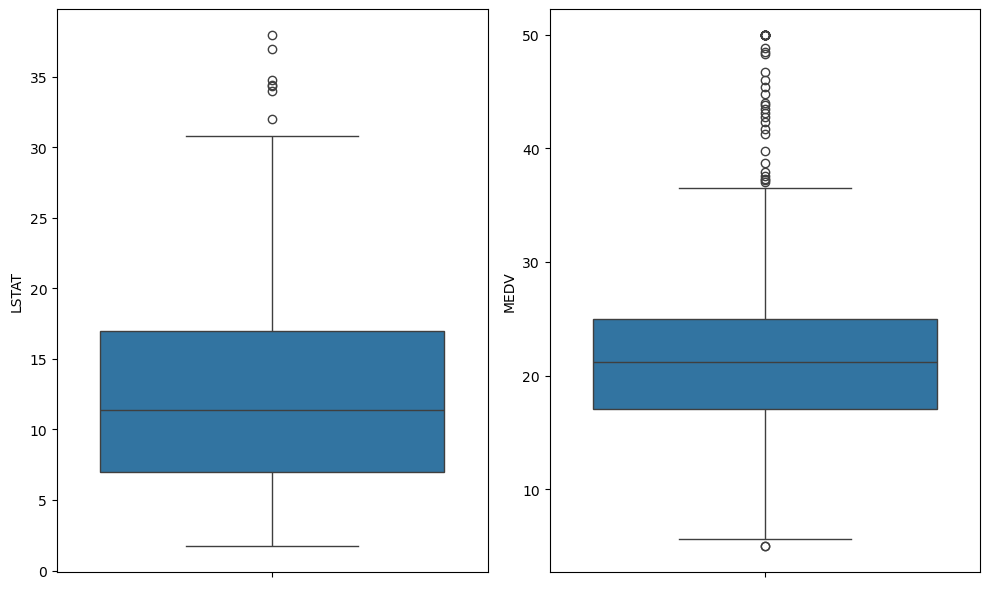

In [31]:
# Function to plot histograms

def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,6))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,6))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])



print("Histograms\n")
plot_continuous_columns(df)

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(df)

Observations:
* The columns CRIM,ZN,B and MEDV are heavily skewed. This is due to the presence of the Outliers present in our dataset. We will deal with outliers in the upcoming steps.
* We can see that the values in the column CHAS are almost 0. This means that Charles River dummy variables are all 0, which in turn means that tract does not bound rivers.
* Since the features CHAS consist majorly only of a single value, it's variance is quite less and hence we can drop it since technically will be of no help in prediction.

# Treating outliers in the continuous columns

In [35]:
from scipy.stats.mstats import winsorize

In [37]:
# Function to treat outliers

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

    return dataframe


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a function called 'detect_outliers', defined above.

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


We can see that the outliers are removed. The outliers, shown above, in columns CRIM,ZN and B are actually not outliers. They are the majority values present in out dataset.

# Prediction of house Price

In [39]:
# Predictors

x = df.iloc[:,:-1]

# This means that we are using all the columns, except 'MEDV', to predict the house price

# Target

y = df.iloc[:,-1]

# This is because MEDV is the 'Median value of owner-occupied homes in $1000s'.
# This shows that this is what we need to predict. So we call it the target variable.

# Feature Selection using Random Forest

Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

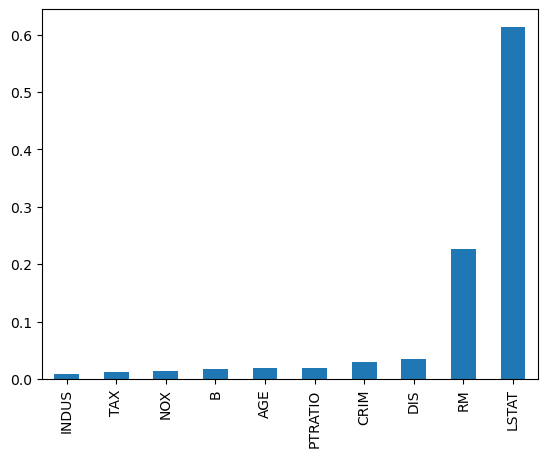

In [41]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(x,y)

Observation:
* We can see that the Important features are sorted in ascending order, along with their importance in the form of bar graph.
* We can clearly observe that LSTAT, RM, DIS and CRIM are the most important features that can be used for prediction.
* This means that we can ignore the other columns for the House price prediction.

In [17]:
x.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02763,18.0,2.31,0,0.538,6.575,65.2,4.0900,2,296.0,15.3,396.9,4.98
1,0.02763,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [43]:
# Modifying the Predictors to improve the effeciency of the model

x= x[['CRIM','DIS','RM','LSTAT']]
x.head(2)

,CRIM,DIS,RM,LSTAT
0,0.02763,4.0900,6.575,4.98
1,0.02763,4.9671,6.421,9.14


# Scaling the feature variables using MinMaxScaler

In [45]:
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [47]:
x.head()

,CRIM,DIS,RM,LSTAT
0,0.000000,0.490733,0.686656,0.066013
1,0.000000,0.654441,0.603458,0.280557
2,0.000000,0.654441,1.000000,0.017019
3,0.000439,0.858839,0.915181,0.000000
4,0.003833,0.858839,0.995678,0.084064


In [49]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

# 1. Linear Regression

In [51]:
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})

In [53]:
coefficients

,Attributes,Coefficients
0,CRIM,-3.877522
1,DIS,-2.6488
2,RM,7.640161
3,LSTAT,-13.810714


In [55]:
y_pred=lr.predict(xtrain)

Model Evaluation
* Training data

In [57]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2:  0.7642226556723264
Adusted R^2:  0.761520336539631
MAE:  2.7496074868748015
MSE:  12.146464209933594
RMSE:  3.4851777874211227


In [59]:
print(metrics.max_error(ytrain, y_pred))

13.607512374416215


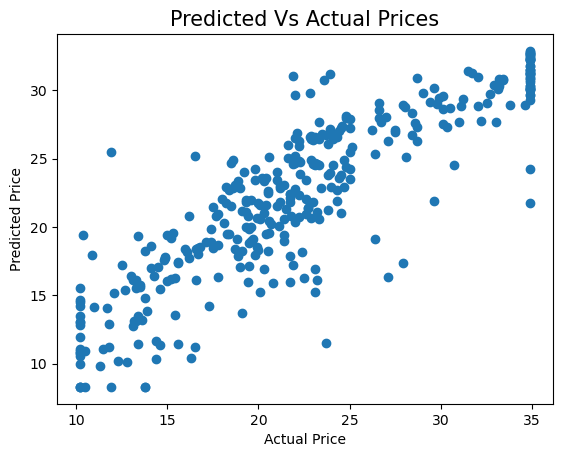

In [61]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

* Test data

In [63]:
# Predicting the Test data with model

ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

R^2:  0.6997582362305644
Adusted R^2:  0.6915883923184709
MAE:  2.952910495701909
MSE:  13.294449553609889
RMSE:  3.6461554483606275


In [65]:
print(metrics.max_error(ytest, ytest_pred))

12.579386511503579


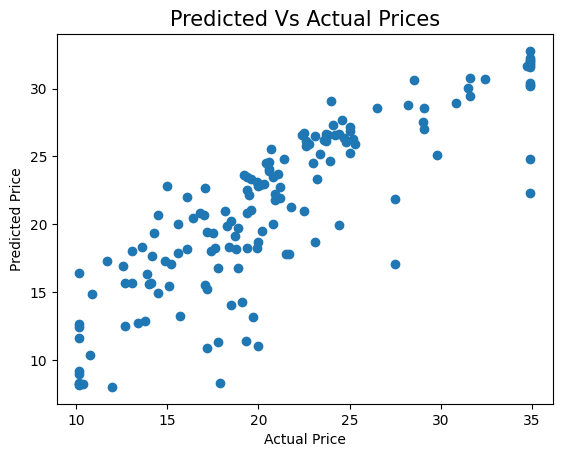

In [30]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

# 2. Random Forest

In [67]:
rfr= RandomForestRegressor()

rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [69]:
y_pred=rfr.predict(xtrain)

Model Evaluation
* Training data

In [71]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.97505716980015
Adusted R^2:  0.974771292090123
MAE:  0.7928020883777223
MSE:  1.2849716124373594
RMSE:  1.133565883589198

Maximum Error:  5.578999999999958


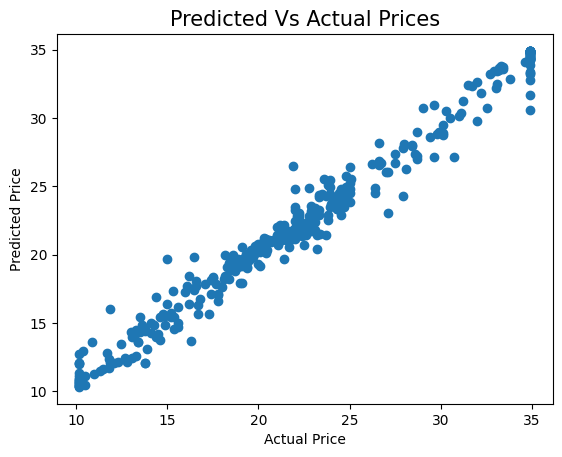

In [34]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

* Test data

In [73]:
# Predicting the Test data with model

ytest_pred=rfr.predict(xtest)

rfr_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",rfr_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.7998751520802294
Adusted R^2:  0.7944295779871744
MAE:  2.011349344715957
MSE:  8.861357799431113
RMSE:  2.9768032853097823

Maximum Error:  14.828


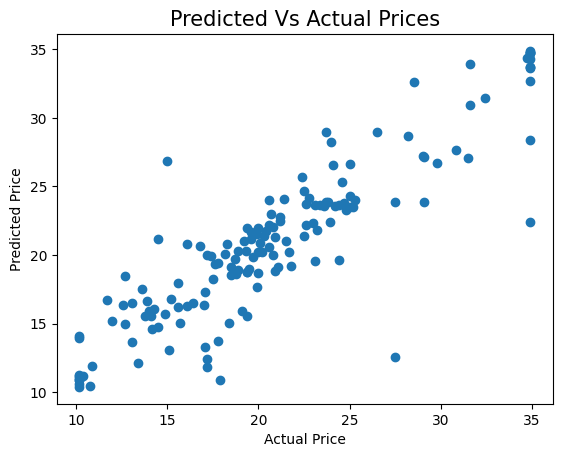

In [36]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

# 3. Support Vector Machine (SVM)

In [75]:
svm_reg=svm.SVR()
svm_reg.fit(xtrain, ytrain)

SVR()

In [77]:
y_pred=svm_reg.predict(xtrain)

Model Evaluation
* Training data

In [83]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.8309969913608581
Adusted R^2:  0.8290599941271717
MAE:  2.1579841631330376
MSE:  8.70647263272909
RMSE:  2.9506732507563576

Maximum Error:  12.779908114045892


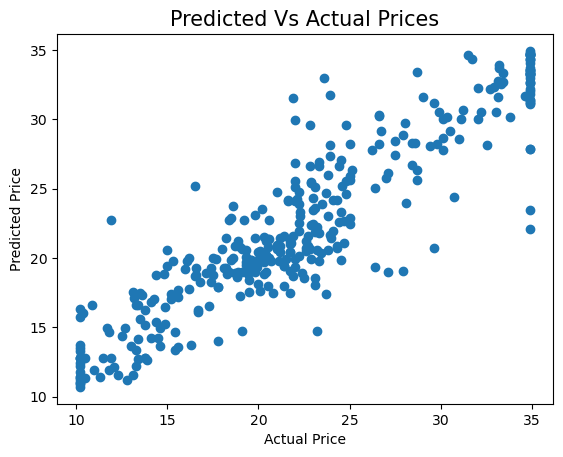

In [85]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

* Test Data

In [87]:
# Predicting the Test data with model

ytest_pred=svm_reg.predict(xtest)

svm_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",svm_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.789952378737008
Adusted R^2:  0.7842367972060422
MAE:  2.2194726718102147
MSE:  9.300729750845129
RMSE:  3.049709781412836

Maximum Error:  13.475185876404343


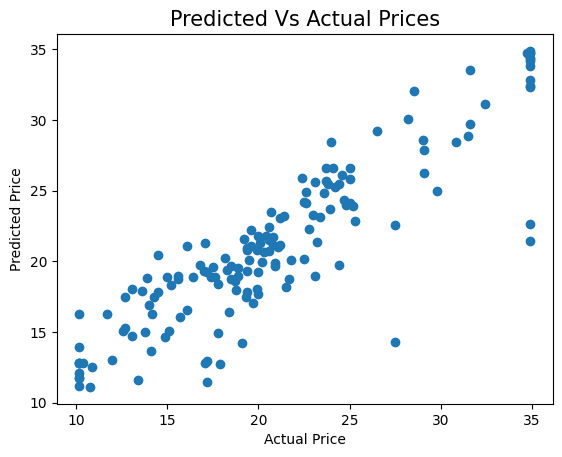

In [42]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

# Evaluation Comparison of all the 3 methods

R-squared

R-squared = (TSS-RSS)/TSS

* Explained variation/ Total variation
* 1 – Unexplained variation/ Total variation

A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa.

* If we had a really low RSS value, it would mean that the regression line was very close to the actual points.
* High RSS value, it would mean that the regression line was far away from the actual points.

In [89]:
models=pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'R_squared Score':[lin_acc*100, rfr_acc*100,svm_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)

,Model,R_squared Score
1,Random Forest,79.987515
2,Support Vector Machine,78.995238
0,Linear Regression,69.975824


Observations:
* We can see that thr R_squared value for Linera regression is the lowest and the Random Forest is the highest.
* It means that Linear Regression gives us better results on test data, when compared to the other 2 models.